In [1]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
import ast

In [2]:
def read_file():
    full_data = pd.DataFrame()
    for file in os.listdir():
        if 'compiled' in file:
            data = pd.read_csv(file, index_col = 0)
            full_data = full_data.append(data)
    return full_data

In [3]:
data = read_file()

In [4]:
data = data.drop_duplicates()

## General counts

In [5]:
data

,url,name,neighbourhood,price,categories,review,user,date
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm
...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020"
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020"
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020"
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020"


In [6]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(data)}')
# Number of restaurants with reviews
num = len(data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28731
No. restaurants: 863


## Clean Cost Column 

In [7]:
data['cleaned_price'] = data['price'].apply(lambda x: int(x.split('/')[0].replace('~$','')) if '$' in x else np.nan)
data.head(3)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0


## Clean Categories

In [8]:
category_mapping = {'Steak':['Western'], 
 'Cocktails':['Alcohol','Drinks'], 
 'Great View': ['Good Environment'], 
 'Sushi':['Japanese'], 
 'Ramen':['Japanese','Noodles'], 
 'Islandwide Delivery':['Delivery'], 
 'Craft Beer':['Drinks','Alcohol'], 
 '1 For 1 Deals':['Value'],
 'Teppanyaki':['Japanese'], 
 'Sustainable Dining on Beyond':['Sustainable'], 
 'Vegan friendly':['Sustainable'], 
 'Kopitiam':['Local Delights'], 
 'Char Kway Teow':['Local Delights','Noodles','Chinese'], 
 'Taiwanese':['Chinese'], 
 'Waffles':['Desserts'], 
 'Zi Char':['Local Delights','Chinese'], 
 'Fruit Tea':['Drinks'], 
 'Pasta':['Western','Noodles'], 
 'Vouchers':['Value'], 
 'Chirashi':['Japanese'], 
 'Bars':['Alcohol','Drinks'], 
 'Burpple Beyond Deals 💰':['Value'], 
 'BITES':['Bites'],
 'Burpple Guides':['Recommended'],
 'Michelin Guide Singapore 2018':['Recommended'],
'Grill & BBQ':['Western','BBQ'], 
'Bread & Pastries':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Vegetarian friendly':['Sustainable'], 
 'Cheap & Good':['Value'], 
 'Mediterranean':['Middle Eastern'], 
 'Michelin Guide Singapore 2017':['Recommended'], 
 'Hawker Food':['Local Delights'], 
 'Ice Cream & Yoghurt':['Desserts'], 
 'Cafes & Coffee':['Desserts','High Tea', 'Breakfast & Brunch'], 
 'Interesting':['Good Environment'],
'Dinner with Drinks':['Drinks'], 
'Bak Kut Teh':['Local Delights', 'Chinese'],
'Burgers':['Western'],
'Korean Desserts': ['Desserts','Korean'],
 'Vegetarian':['Sustainable'], 
 'Nasi Lemak':['Malay','Local Delights'], 
 'Salads':['Western'], 
'TAKEAWAY OPTION':['Convenient'],
'Delivery':['Convenient'], 
'Sandwiches':['High Tea', 'Breakfast & Brunch', 'Western'], 
'Pizza':['Western'],
'Vegan':['Sustainable'], 
'Dim Sum':['Chinese'], 
'Chicken Rice':['Local Delights','Chinese'], 
'Fried Chicken':['Korean', 'Western', 'Bites','Fast Food'], 
'Korean BBQ':['Korean','BBQ'],
'Filipino Local Delights':['Filipino'], 
'Cakes':['Desserts','High Tea'], 
'Michelin Guide Singapore 2019':['Recommended'],
 'Korean Fried Chicken':['Korean','Bites','Fast Food'], 
'Hot Pot': ['Chinese', 'Rainy Day Comforts'], 
'Late Night':['Supper'],
 'Bubble Tea':['Drinks'],
 'BEYOND': ['Recommended', 'Value']
 }

In [9]:
# find unique categories 
def find_unique_categories(category_col_name, data):
    all_categories = []
    for categories in data[category_col_name]:
        try:
            all_categories.extend(ast.literal_eval(categories))
        except:
            all_categories.extend(categories)
    print(f'Num of Categories:{len(set(all_categories))}')
    for i in set(all_categories):
        print(i)
    return list(set(all_categories))
    

In [10]:
find_unique_categories('categories', data)

Num of Categories:101
Michelin Guide Singapore 2019
Sandwiches
Taiwanese
Vouchers
European
Pizza
Bites
Greek
Desserts
Turkish
Vegan friendly
Russian
Late Night
Cafes & Coffee
Burpple Guides
Korean Desserts
Fast Food
Hidden Gem
Fruit Tea
Mediterranean
Cocktails
Seafood
Vietnamese
Halal
Kopitiam
Hot Pot
Sushi
Soup
French
Great View
Middle Eastern
Pet-Friendly
Rainy Day Comforts
Dinner with Drinks
Burgers
Chicken Rice
Korean
Steak
Thai
Nasi Lemak
High Tea
Grill & BBQ
Date Night
Spanish
Ramen
Korean BBQ
Sustainable Dining on Beyond
Western
Salads
Delivery
Vegetarian friendly
Indonesian
Argentinian
Hawker Food
Japanese
Teppanyaki
Kid Friendly
Waffles
Italian
Dim Sum
Ice Cream & Yoghurt
Vegan
Buffets
Chirashi
Bread & Pastries
Bubble Tea
BBQ
Bars
Fine Dining
1 For 1 Deals
Noodles
Local Delights
Cakes
Indian
Newly Opened
Good For Groups
Korean Fried Chicken
Pasta
Healthy
Craft Beer
Interesting
Zi Char
BITES
Vegetarian
Peranakan
Burpple Beyond Deals 💰
Supper
Michelin Guide Singapore 2017
Mexica

['Michelin Guide Singapore 2019',
 'Sandwiches',
 'Taiwanese',
 'Vouchers',
 'European',
 'Pizza',
 'Bites',
 'Greek',
 'Desserts',
 'Turkish',
 'Vegan friendly',
 'Russian',
 'Late Night',
 'Cafes & Coffee',
 'Burpple Guides',
 'Korean Desserts',
 'Fast Food',
 'Hidden Gem',
 'Fruit Tea',
 'Mediterranean',
 'Cocktails',
 'Seafood',
 'Vietnamese',
 'Halal',
 'Kopitiam',
 'Hot Pot',
 'Sushi',
 'Soup',
 'French',
 'Great View',
 'Middle Eastern',
 'Pet-Friendly',
 'Rainy Day Comforts',
 'Dinner with Drinks',
 'Burgers',
 'Chicken Rice',
 'Korean',
 'Steak',
 'Thai',
 'Nasi Lemak',
 'High Tea',
 'Grill & BBQ',
 'Date Night',
 'Spanish',
 'Ramen',
 'Korean BBQ',
 'Sustainable Dining on Beyond',
 'Western',
 'Salads',
 'Delivery',
 'Vegetarian friendly',
 'Indonesian',
 'Argentinian',
 'Hawker Food',
 'Japanese',
 'Teppanyaki',
 'Kid Friendly',
 'Waffles',
 'Italian',
 'Dim Sum',
 'Ice Cream & Yoghurt',
 'Vegan',
 'Buffets',
 'Chirashi',
 'Bread & Pastries',
 'Bubble Tea',
 'BBQ',
 'Bars',


In [11]:
# map categories
all_new_categories = []
for idx, row in data.iterrows():
    categories = ast.literal_eval(row['categories'])
    new_categories = []
    for category in categories:
        if category in category_mapping.keys():
            new_categories.extend(category_mapping[category])
        else:
            new_categories.append(category)
    all_new_categories.append(new_categories)

data['cleaned_categories'] = all_new_categories

In [12]:
# find unique categories after mapping
list_cleaned_categories = find_unique_categories('cleaned_categories', data)

Num of Categories:51
Soup
Indonesian
French
Argentinian
Japanese
Peranakan
Recommended
Middle Eastern
European
Kid Friendly
Pet-Friendly
Italian
Bites
Alcohol
Greek
Rainy Day Comforts
Value
Desserts
Turkish
Supper
Buffets
Mexican
BBQ
Filipino
Fine Dining
Korean
Noodles
Local Delights
Good Environment
Russian
Indian
Fast Food
Good For Groups
Thai
Newly Opened
Drinks
Hidden Gem
Malay
High Tea
Healthy
Date Night
Spanish
Seafood
Vietnamese
Sustainable
Western
Halal
Breakfast & Brunch
Chinese
Delivery
Convenient


## Check for null values

In [13]:
# Check if there is any null value
data.isna().apply(pd.value_counts)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories
False,28731.0,28731.0,28708,28731.0,28731.0,28731.0,28731.0,28731.0,28302,28731.0
True,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,429,NaN


In [14]:
# 89 reviews have no neighbourhood. Thus, we drop these reviews.
cleaned_data = data[~data['neighbourhood'].isna()]

# 1781 reviews have no price. Thus, we drop these reviews.
cleaned_data = data[~data['cleaned_price'].isna()]

In [15]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(cleaned_data)}')
# Number of restaurants with reviews
num = len(cleaned_data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28302
No. restaurants: 845


## Convert Cat Variables to Binary Variables

In [16]:
list_cleaned_categories = find_unique_categories('cleaned_categories', cleaned_data)
list_cleaned_categories

Num of Categories:51
Soup
Indonesian
French
Argentinian
Japanese
Peranakan
Recommended
Middle Eastern
European
Kid Friendly
Pet-Friendly
Italian
Bites
Alcohol
Greek
Rainy Day Comforts
Value
Desserts
Turkish
Supper
Buffets
Mexican
BBQ
Filipino
Fine Dining
Korean
Noodles
Local Delights
Good Environment
Russian
Indian
Fast Food
Good For Groups
Thai
Newly Opened
Drinks
Hidden Gem
Malay
High Tea
Healthy
Date Night
Spanish
Seafood
Vietnamese
Sustainable
Western
Halal
Breakfast & Brunch
Chinese
Delivery
Convenient


['Soup',
 'Indonesian',
 'French',
 'Argentinian',
 'Japanese',
 'Peranakan',
 'Recommended',
 'Middle Eastern',
 'European',
 'Kid Friendly',
 'Pet-Friendly',
 'Italian',
 'Bites',
 'Alcohol',
 'Greek',
 'Rainy Day Comforts',
 'Value',
 'Desserts',
 'Turkish',
 'Supper',
 'Buffets',
 'Mexican',
 'BBQ',
 'Filipino',
 'Fine Dining',
 'Korean',
 'Noodles',
 'Local Delights',
 'Good Environment',
 'Russian',
 'Indian',
 'Fast Food',
 'Good For Groups',
 'Thai',
 'Newly Opened',
 'Drinks',
 'Hidden Gem',
 'Malay',
 'High Tea',
 'Healthy',
 'Date Night',
 'Spanish',
 'Seafood',
 'Vietnamese',
 'Sustainable',
 'Western',
 'Halal',
 'Breakfast & Brunch',
 'Chinese',
 'Delivery',
 'Convenient']

In [17]:
# append empty columns with category names
cleaned_data = cleaned_data.reindex(cleaned_data.columns.tolist() + list_cleaned_categories, axis=1)

In [18]:
for category in list_cleaned_categories:
    print(category)
    cleaned_data[category] = cleaned_data['cleaned_categories'].apply(lambda x: 1 if category in x else 0)

Soup
Indonesian
French
Argentinian
Japanese
Peranakan
Recommended
Middle Eastern
European
Kid Friendly
Pet-Friendly
Italian
Bites
Alcohol
Greek
Rainy Day Comforts
Value
Desserts
Turkish
Supper
Buffets
Mexican
BBQ
Filipino
Fine Dining
Korean
Noodles
Local Delights
Good Environment
Russian
Indian
Fast Food
Good For Groups
Thai
Newly Opened
Drinks
Hidden Gem
Malay
High Tea
Healthy
Date Night
Spanish
Seafood
Vietnamese
Sustainable
Western
Halal
Breakfast & Brunch
Chinese
Delivery
Convenient


Problem: some categories only got 1 or 2 rows.. should we make it broader. Set a threshold? If less than n restaurants, broaden the categories

## Mapping Neighbourhoods to Regions

In [19]:
neighbourhood_to_region_mapping = pd.read_excel('neighbourhood_to_region_mapping.xlsx')
neighbourhood_to_region_mapping['neighbourhood'] = neighbourhood_to_region_mapping['neighbourhood'].apply(lambda x: x.replace('\xa0',''))
neighbourhood_to_region_mapping = neighbourhood_to_region_mapping.set_index('neighbourhood').T.to_dict('records')[0]

In [20]:
cleaned_data['region'] = cleaned_data['neighbourhood'].apply(lambda x: neighbourhood_to_region_mapping[x])

In [21]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Seafood,Vietnamese,Sustainable,Western,Halal,Breakfast & Brunch,Chinese,Delivery,Convenient,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central


In [22]:
cleaned_data.to_csv('cleaned_restaurant_reviews.csv')

## Categorical EDA

In [23]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Seafood,Vietnamese,Sustainable,Western,Halal,Breakfast & Brunch,Chinese,Delivery,Convenient,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central


Pie Chart of restaurants/reviews by neighbourhood - if got too many cats we do bar chart DONE
Bar chart by restaurants/reviews by category (might not sum to 100 bc 1 restaurant can be in multiple categories) DONE
Histogram of number of reviews for each restaurant -> 10-20 reviews (10 rest), 20-30 reviews (20 rest) DONE
Box and whiskers plot for price data DONE
Normal distribution chart for price data 
Number of reviews per date

#### Bar Chart of Restaurants by Neighbourhood

In [24]:
num_rest_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_North = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

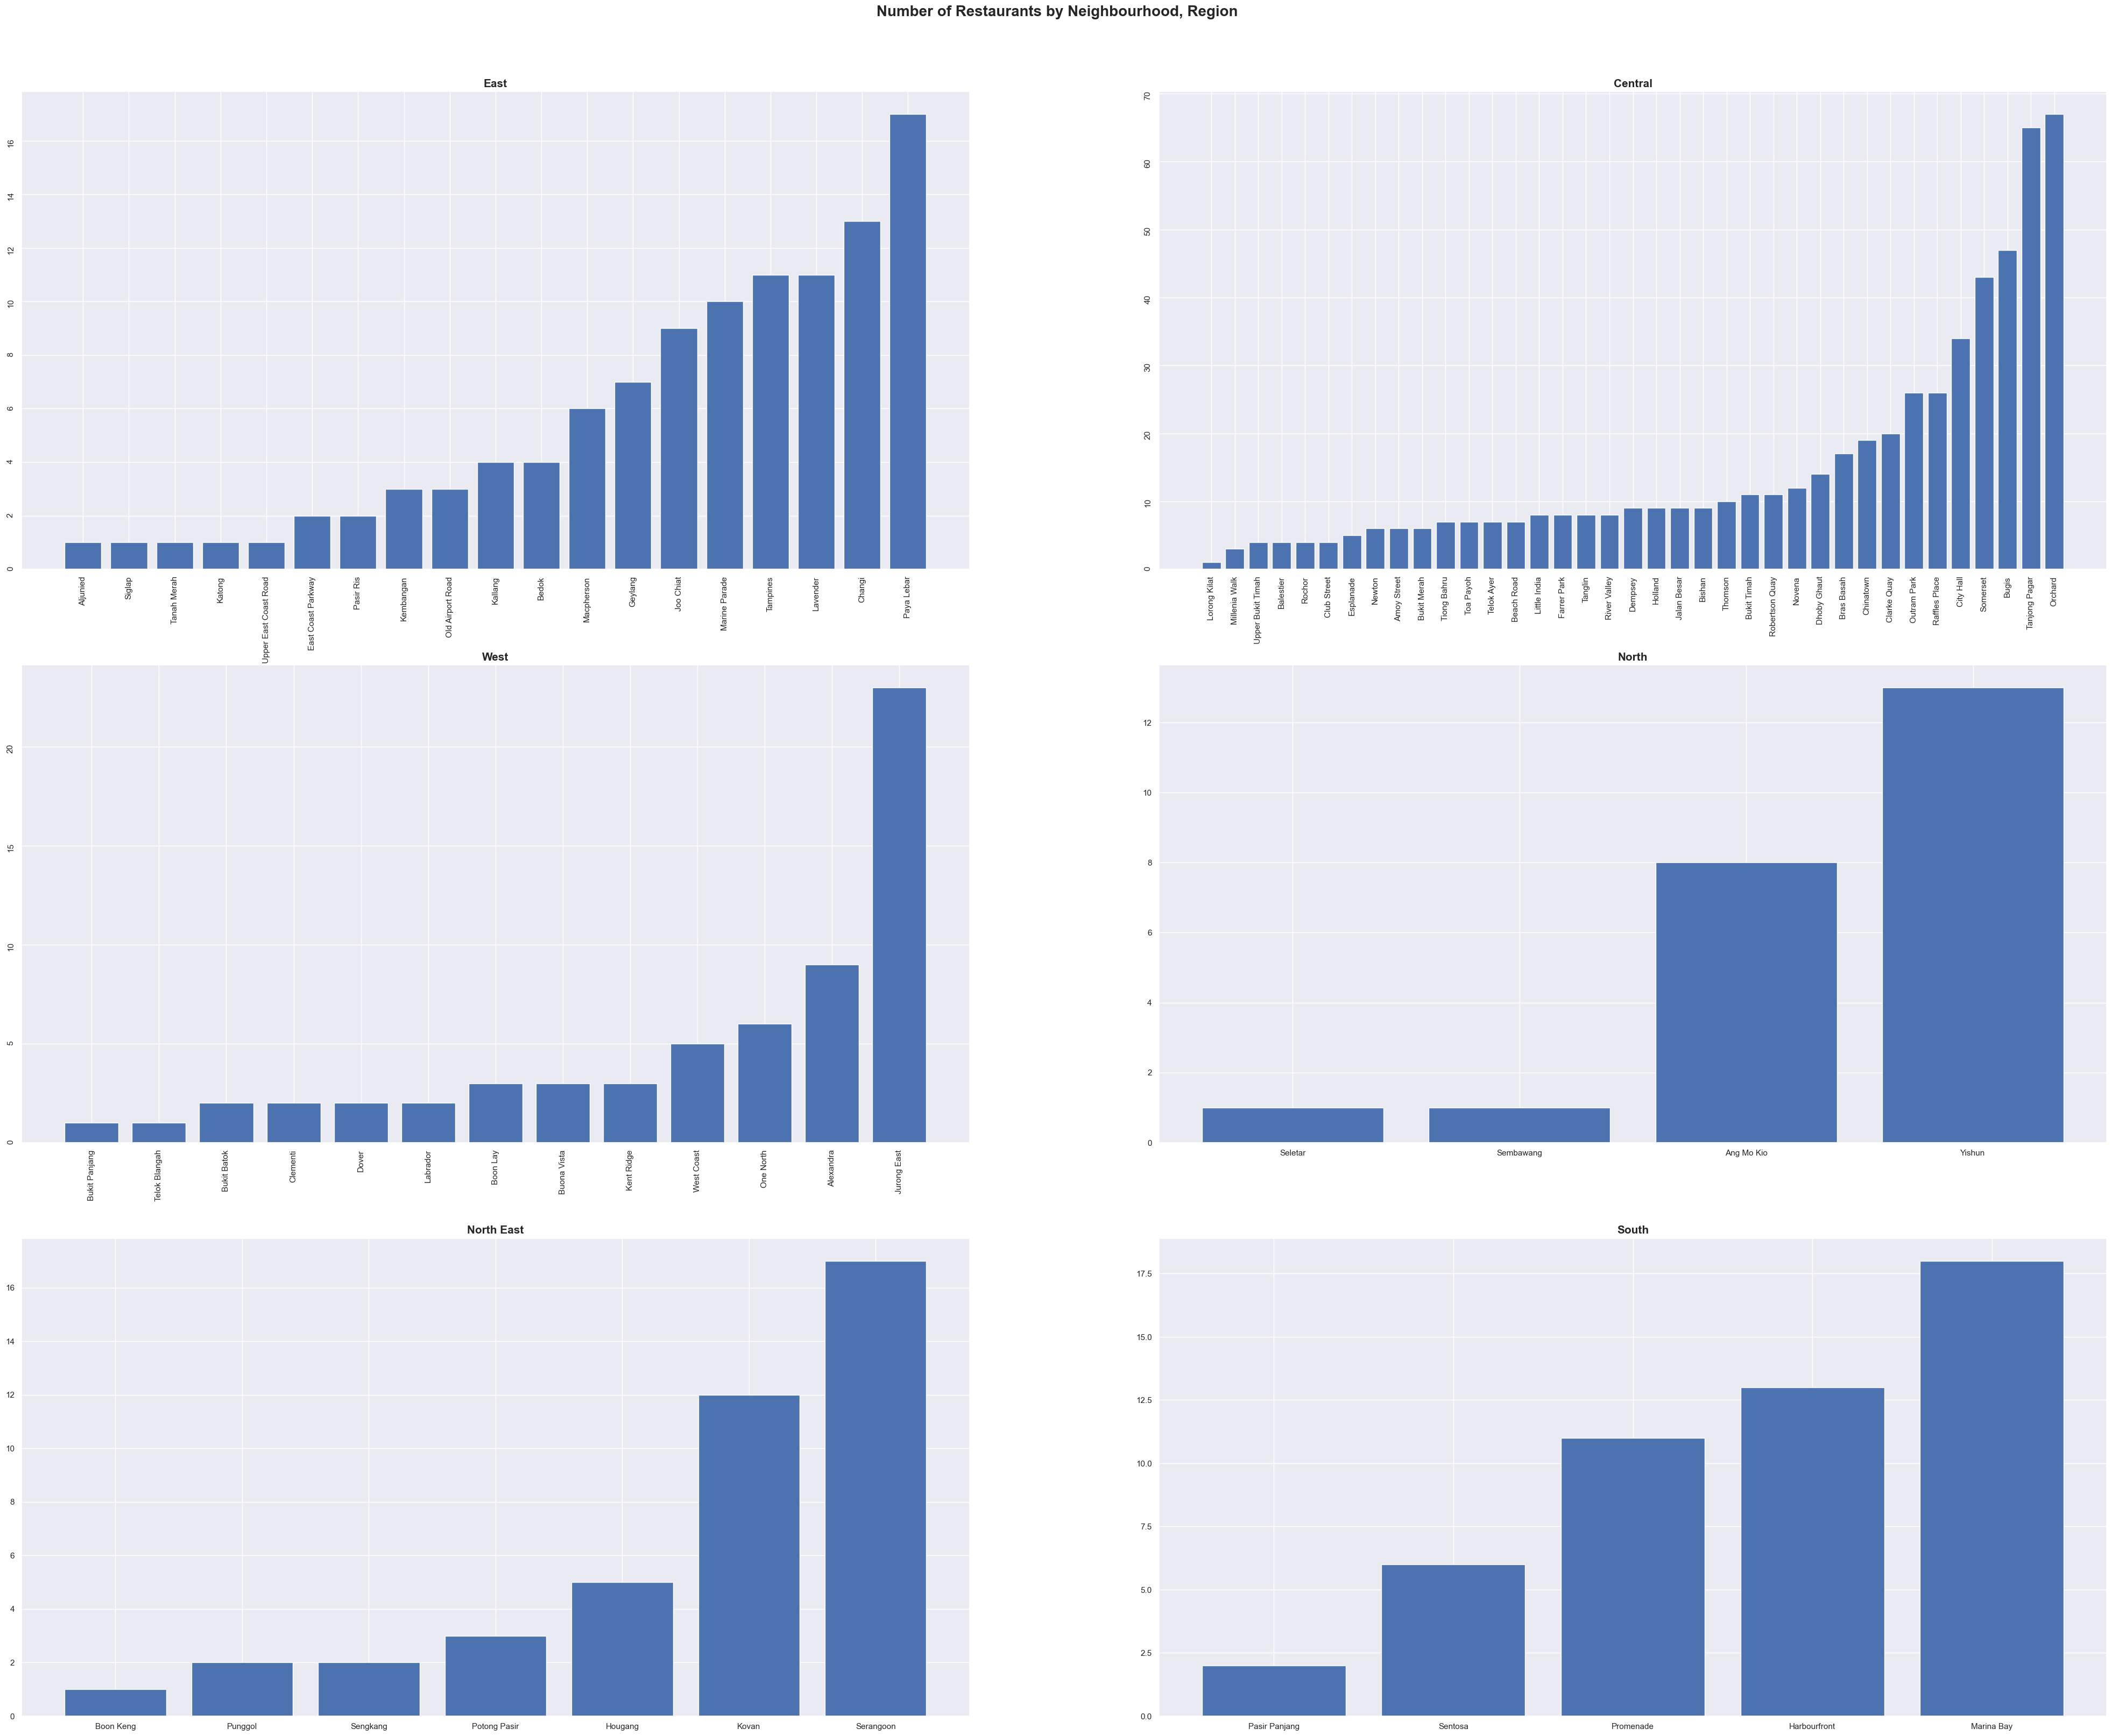

In [25]:

fig, axs = plt.subplots(3,2, figsize=(50, 40))
axs[0][0].bar(num_rest_by_neighbourhood_East['neighbourhood'], num_rest_by_neighbourhood_East['url'])
axs[0][1].bar(num_rest_by_neighbourhood_Central['neighbourhood'], num_rest_by_neighbourhood_Central['url'])
axs[1][0].bar(num_rest_by_neighbourhood_West['neighbourhood'], num_rest_by_neighbourhood_West['url'])
axs[1][1].bar(num_rest_by_neighbourhood_North['neighbourhood'], num_rest_by_neighbourhood_North['url'])
axs[2][0].bar(num_rest_by_neighbourhood_NE['neighbourhood'], num_rest_by_neighbourhood_NE['url'])
axs[2][1].bar(num_rest_by_neighbourhood_South['neighbourhood'], num_rest_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Restaurants by Region

In [26]:
num_rest_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Restaurants by Region')

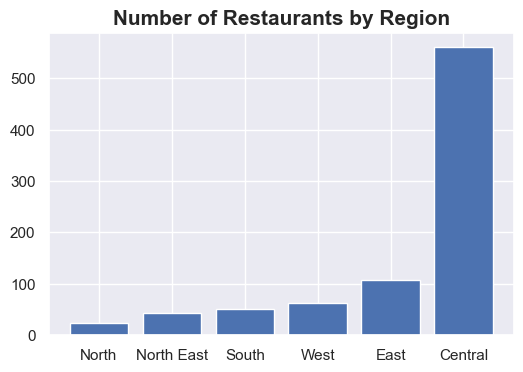

In [27]:
plt.bar(num_rest_by_region['region'],num_rest_by_region['url'])
plt.title('Number of Restaurants by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Reviews by Neighbourhood

In [28]:
num_reviews_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_North= pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

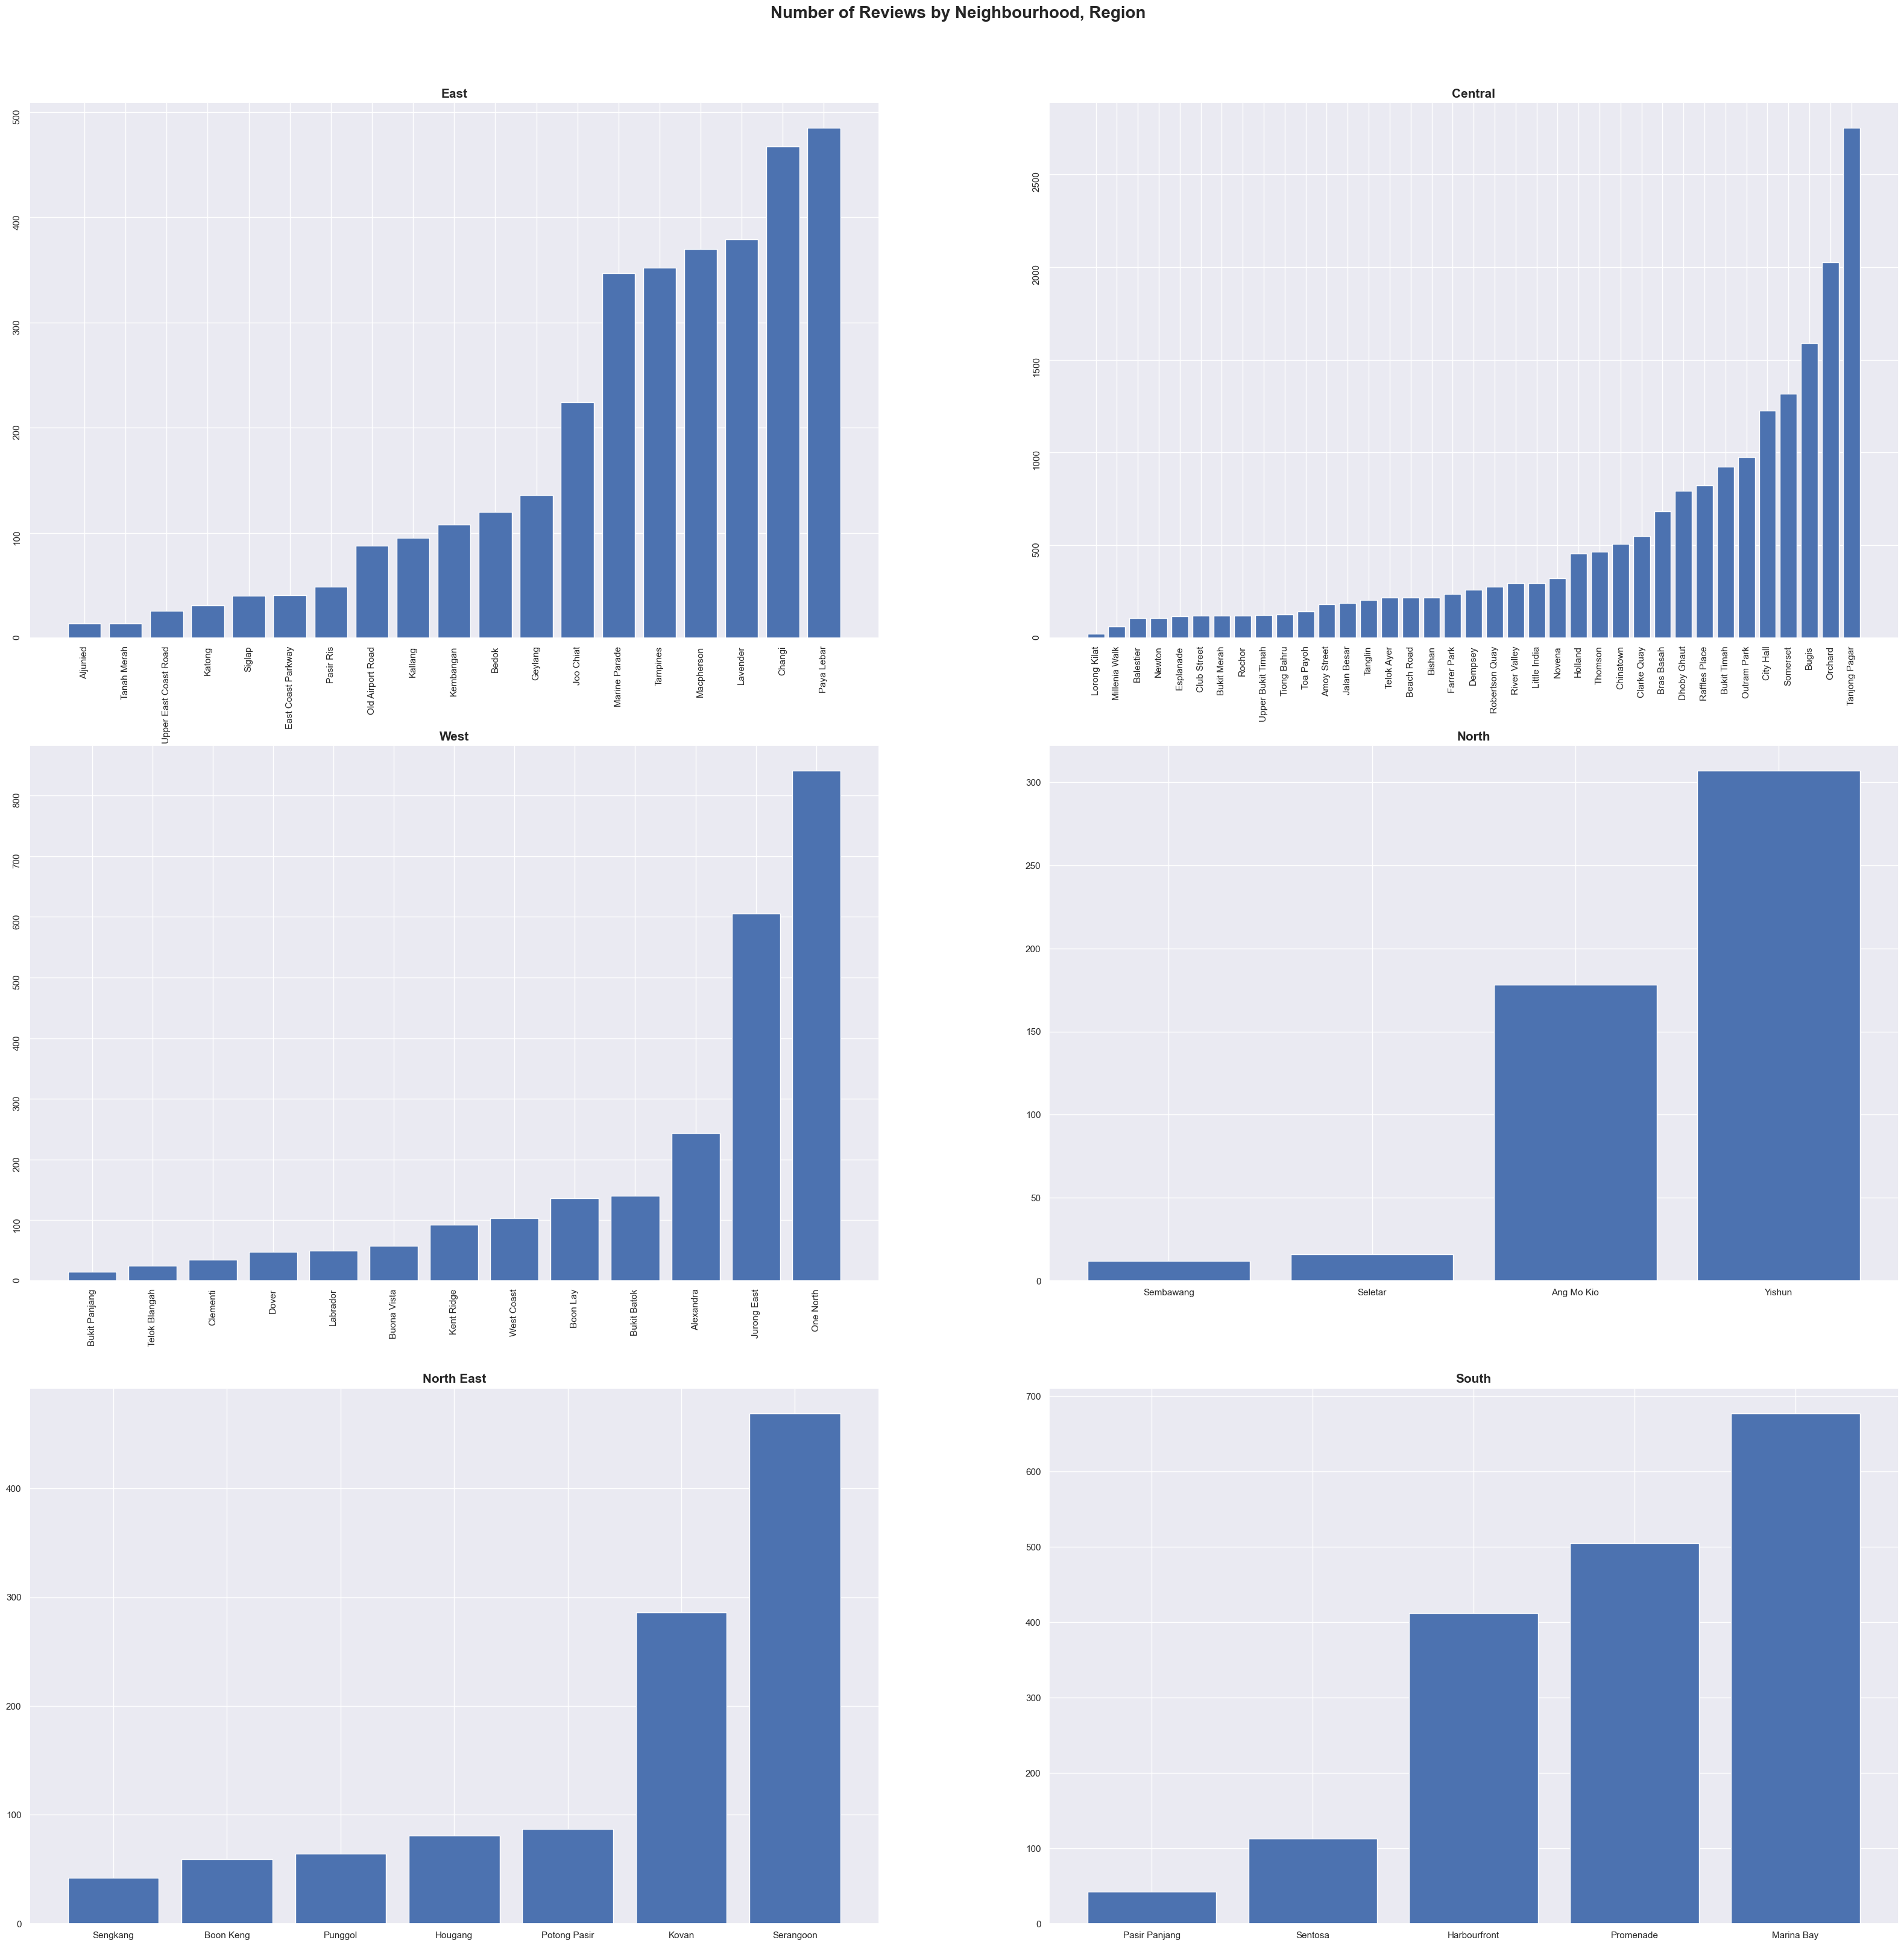

In [29]:
fig, axs = plt.subplots(3,2, figsize=(40, 40))
axs[0][0].bar(num_reviews_by_neighbourhood_East['neighbourhood'], num_reviews_by_neighbourhood_East['url'])
axs[0][1].bar(num_reviews_by_neighbourhood_Central['neighbourhood'], num_reviews_by_neighbourhood_Central['url'])
axs[1][0].bar(num_reviews_by_neighbourhood_West['neighbourhood'], num_reviews_by_neighbourhood_West['url'])
axs[1][1].bar(num_reviews_by_neighbourhood_North['neighbourhood'], num_reviews_by_neighbourhood_North['url'])
axs[2][0].bar(num_reviews_by_neighbourhood_NE['neighbourhood'], num_reviews_by_neighbourhood_NE['url'])
axs[2][1].bar(num_reviews_by_neighbourhood_South['neighbourhood'], num_reviews_by_neighbourhood_South['url'])

fig.suptitle('Number of Reviews by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Reviews by Region

In [30]:
num_reviews_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Reviews by Region')

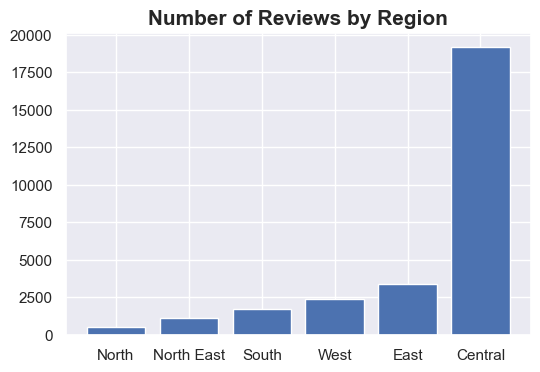

In [31]:
plt.bar(num_reviews_by_region['region'],num_reviews_by_region['url'])
plt.title('Number of Reviews by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Restaurants by Category

In [32]:
rest_cat_df = cleaned_data.iloc[:, cleaned_data.columns.get_loc('cleaned_categories')+1:-1]
rest_cat_df['url'] = cleaned_data['url']


In [33]:
rest_cat_counts = rest_cat_df.drop_duplicates(['url'])
rest_cat_counts = pd.DataFrame(rest_cat_counts.sum()).reset_index().iloc[:-1,:].sort_values(0)

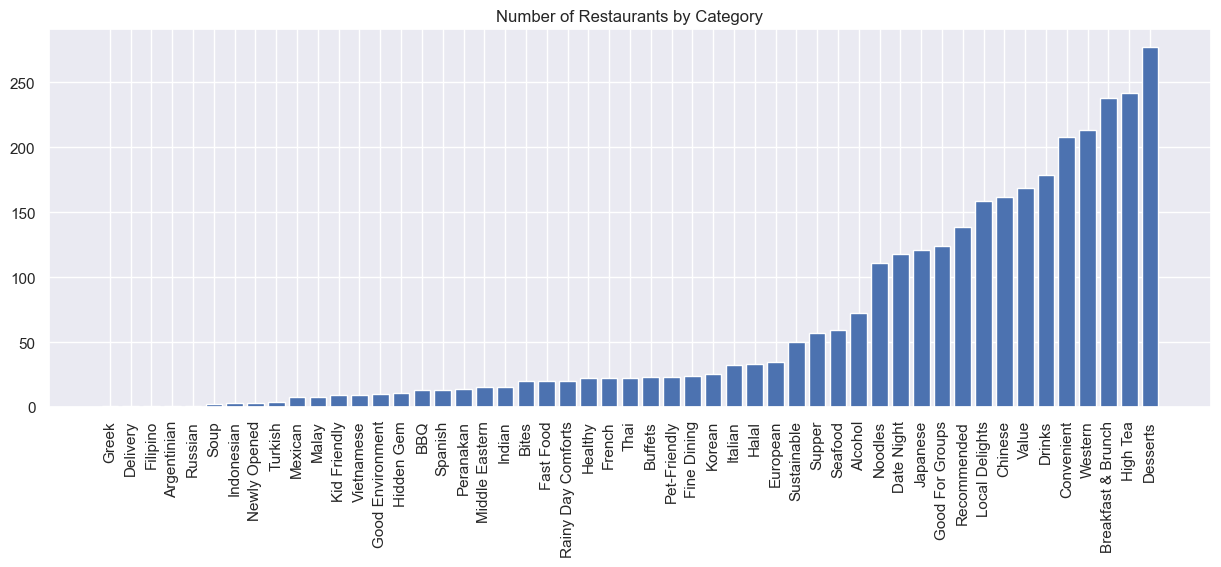

In [34]:
plt.figure(figsize=(15,5))
plt.bar(rest_cat_counts['index'], rest_cat_counts[0])
plt.xticks(rotation = 90)
plt.title('Number of Restaurants by Category')
plt.show()

#### Bar Chart of Reviews by Category

In [35]:
reviews_cat_df = pd.DataFrame(rest_cat_df.sum()).reset_index().iloc[:-1,:].sort_values(0)

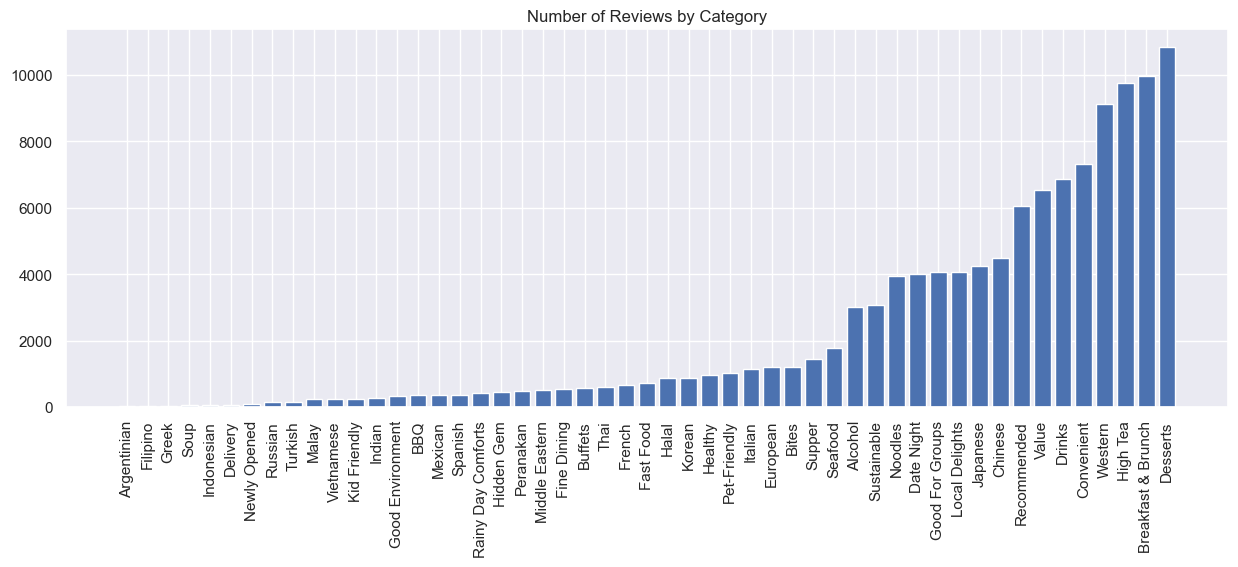

In [36]:
plt.figure(figsize=(15,5))
plt.bar(reviews_cat_df['index'], reviews_cat_df[0])
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Category')
plt.show()

#### Histogram of Number of reviews by Restaurant

In [37]:
num_reviews_by_rest = pd.DataFrame(cleaned_data.groupby('url')['name'].count()).reset_index()

In [38]:
num_reviews_by_rest.describe()

,name
count,845.000000
mean,33.493491
std,32.602177
min,10.000000
25%,16.000000
50%,24.000000
75%,38.000000
max,357.000000


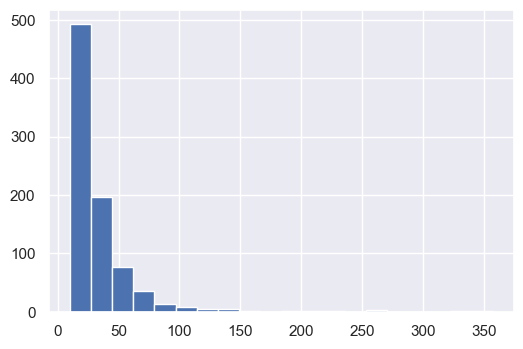

In [39]:
plt.hist(num_reviews_by_rest['name'], bins = 20)
plt.show()

#### Box & Whiskers For Price

In [40]:
box_df = cleaned_data.drop_duplicates('url')

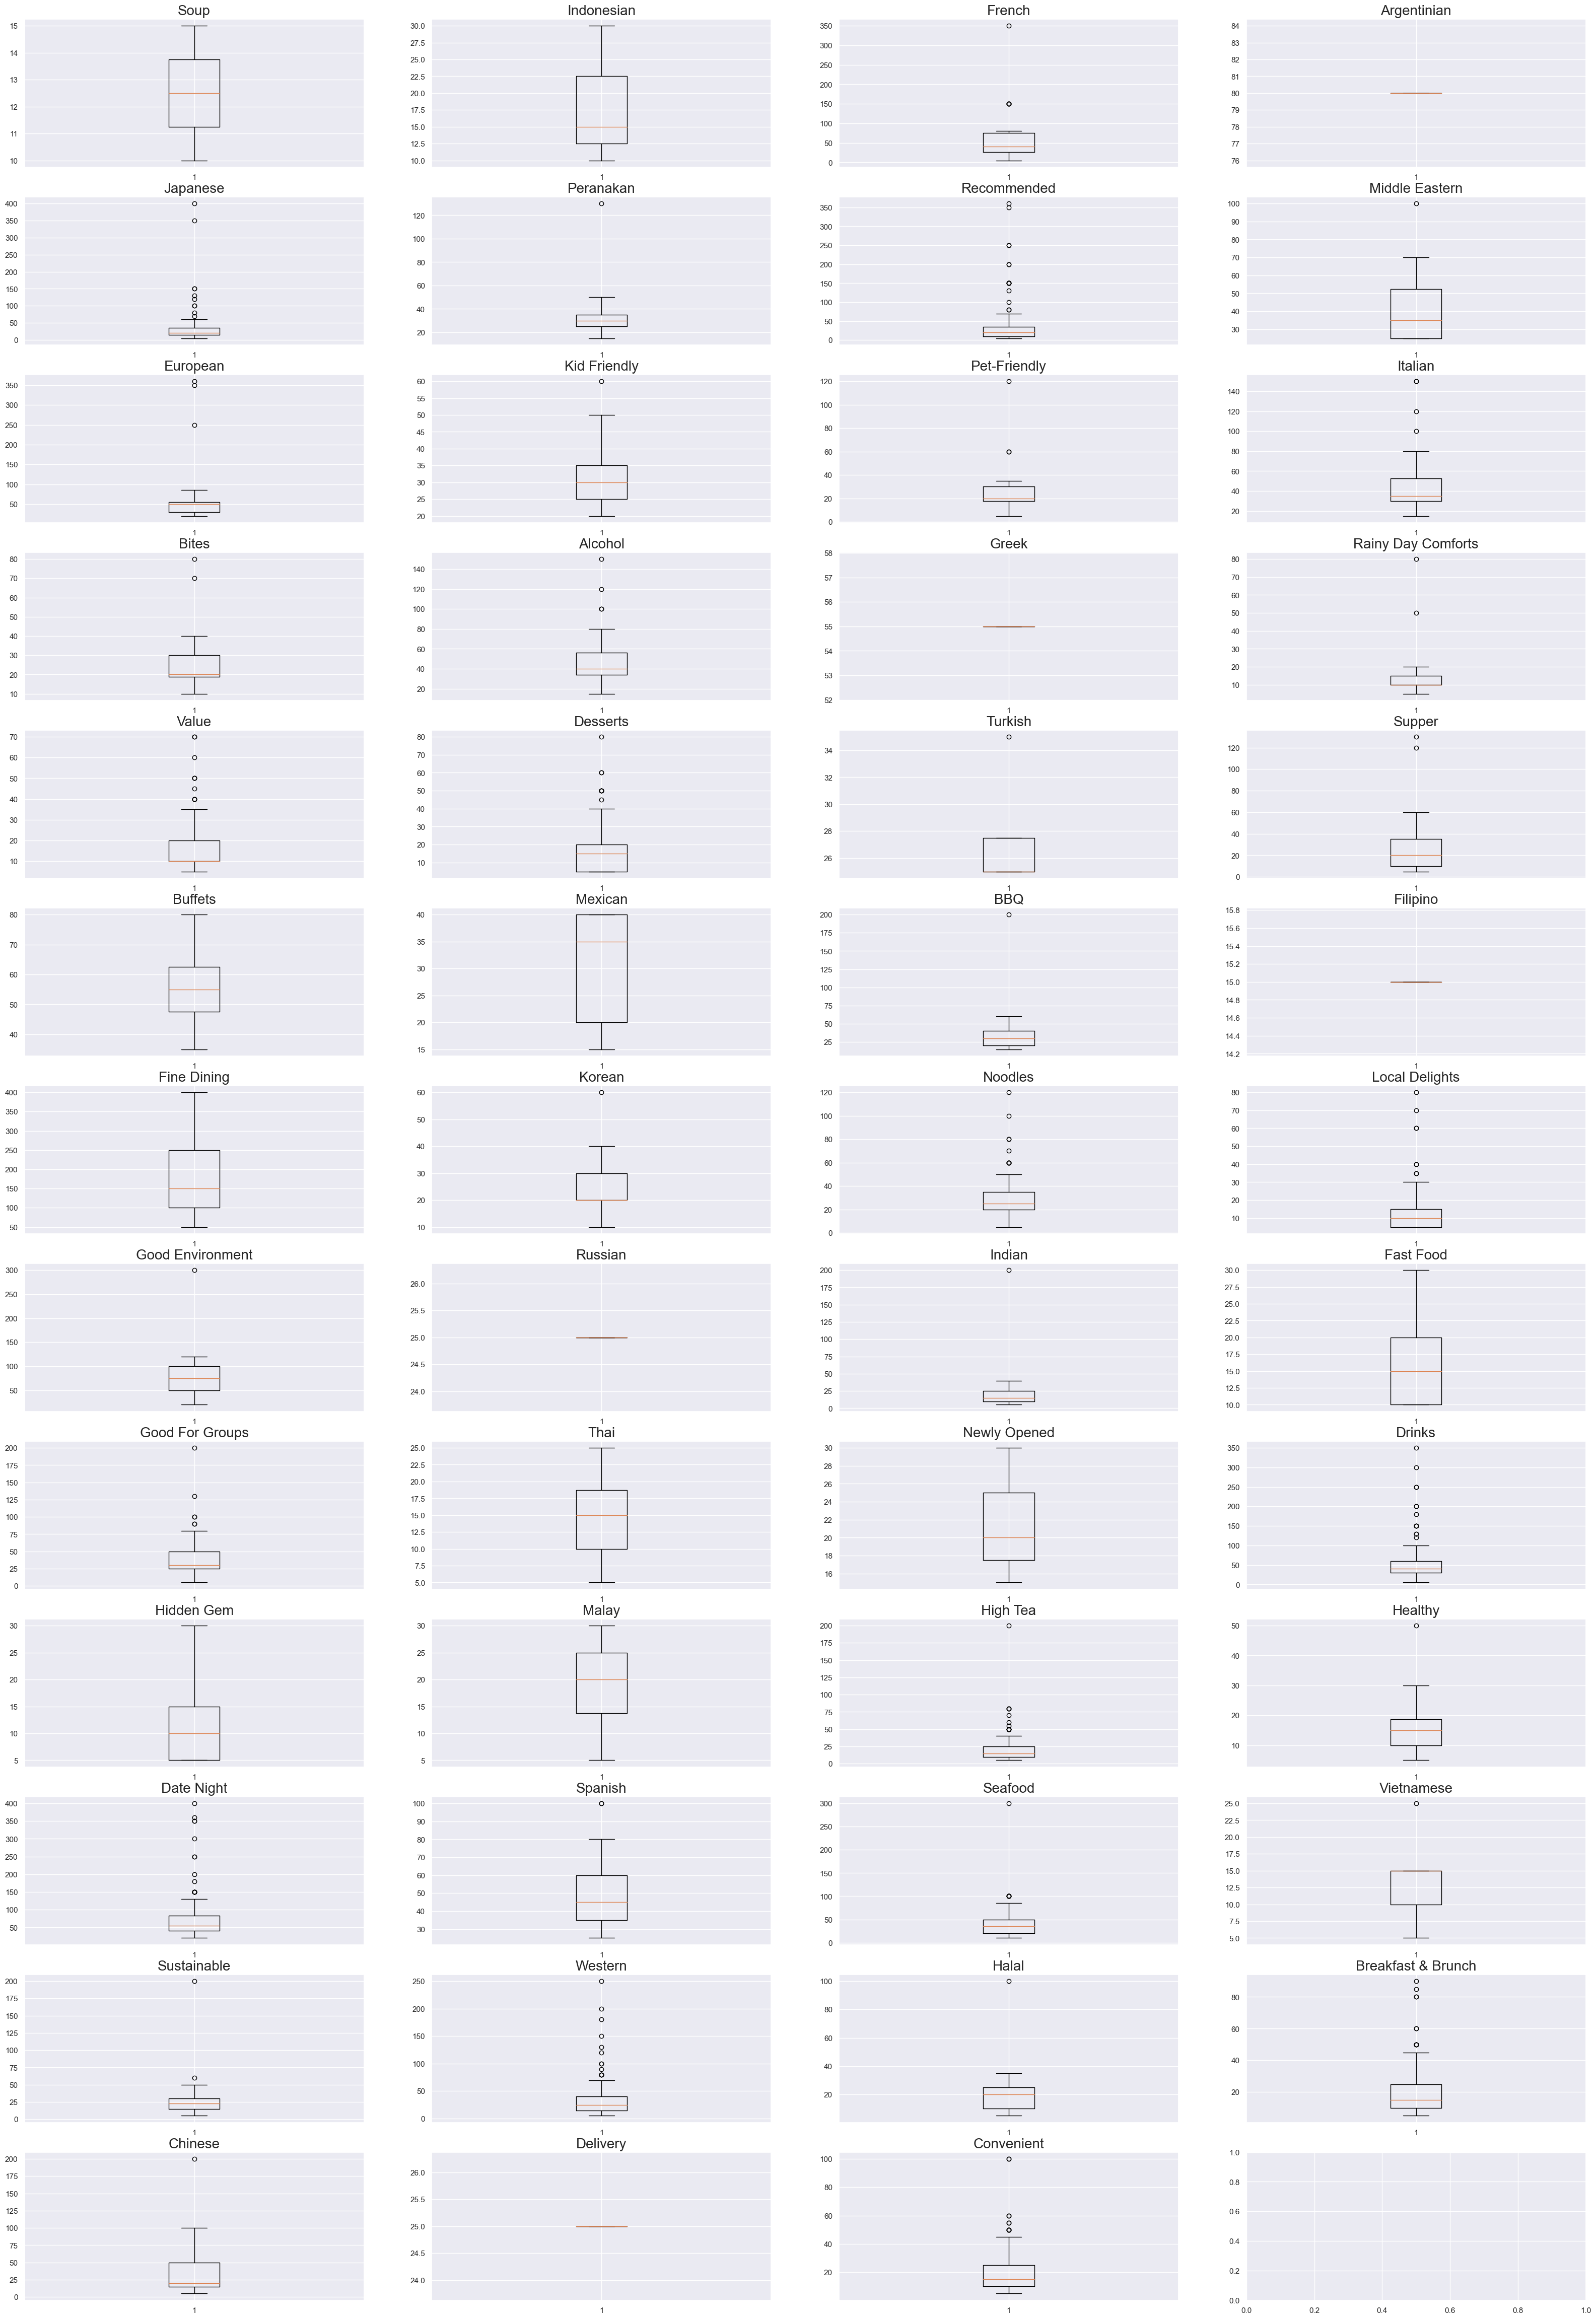

In [41]:
fig, axs = plt.subplots(13,4, figsize=(40, 60))

for index, name in enumerate(list_cleaned_categories):
    cat_df = box_df[box_df[name] == 1]
    axs[index//4,index%4].boxplot(cat_df['cleaned_price'])
    axs[index//4,index%4].set_title(name, fontsize=20)
    


# for i in range(0,4):
#     for j in range(0,13):
#         for category in list_cleaned_categories:
#             cat_df = box_df[box_df[category] == 1]
#             axs[i][j].boxplot(cat_df['cleaned_price'])
            


Do box and whiskers for price by region

#### Histogram for Price

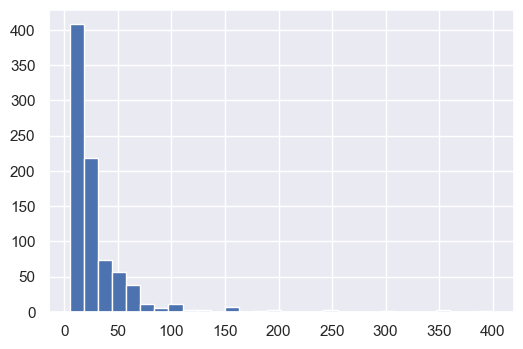

In [42]:
plt.hist(box_df['cleaned_price'], bins = 30) ## find the x limit thing
plt.show()

#### Number of Reviews by Date

In [43]:
from datetime import date, time, datetime
date(year=2023, month=3, day=15)

datetime.date(2023, 3, 15)

In [44]:
import calendar
cal_dict = dict((month, index) for index, month in enumerate(calendar.month_abbr) if month)

In [45]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Seafood,Vietnamese,Sustainable,Western,Halal,Breakfast & Brunch,Chinese,Delivery,Convenient,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,0,0,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,0,0,1,0,0,Central


In [46]:
cleaned_dates = []
for idx, row in cleaned_data.iterrows():
    dt = row['date'].strip()
    if 'ago' in dt:
        if 'm' in dt or 'h' in dt or 's' in dt:
            cleaned_dates.append(date(2023, 3, 15))
        elif 'week' in dt:
            cleaned_dates.append(date(2023, 3, 8))
        else:
            dt_new = int(dt.replace('d ago', ''))
            dt_new = 15- dt_new
            cleaned_dates.append(date(2023, 3, dt_new))
            
    elif 'at' in dt:
        mth_day = dt.split(' ')
        new_date = date(2023, cal_dict[mth_day[0]], int(mth_day[1]))
        if new_date > date(2023,3,15):
            cleaned_dates.append(date(2022,cal_dict[mth_day[0]], int(mth_day[1])))
        else:
            cleaned_dates.append(date(2023, cal_dict[mth_day[0]], int(mth_day[1])))
    
    else:
        mth_day = dt.split(',')[0].split(' ')
        cleaned_dates.append(date(int(dt.split(',')[-1]), cal_dict[mth_day[0]], int(mth_day[1])))

In [47]:
cleaned_data['cleaned_dates'] = cleaned_dates

In [71]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Sustainable,Western,Halal,Breakfast & Brunch,Chinese,Delivery,Convenient,region,cleaned_dates,mmyyyy
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2023-03-15,03/23
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,07/22
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,07/22
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,07/22
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,07/22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-27,10/20
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-26,10/20
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-09,10/20
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-01,10/20


In [78]:
from dateutil.parser import parse
dt = parse('Mon Feb 15 2010')
cleaned_data['mmyyyy'] = cleaned_data['cleaned_dates'].apply(lambda x: date(x.year, x.month, 1))

In [79]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Sustainable,Western,Halal,Breakfast & Brunch,Chinese,Delivery,Convenient,region,cleaned_dates,mmyyyy
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2023-03-15,2023-03-01
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"[Local Delights, Supper, Value]",...,0,0,0,0,0,0,0,East,2022-07-30,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-27,2020-10-01
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-26,2020-10-01
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-09,2020-10-01
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"[Chinese, Good For Groups]",...,0,0,0,0,1,0,0,Central,2020-10-01,2020-10-01


In [80]:
new_df = cleaned_data.groupby('mmyyyy')['url'].count().reset_index()
new_df

,mmyyyy,url
0,2020-01-01,944
1,2020-02-01,946
2,2020-03-01,1163
3,2020-04-01,497
4,2020-05-01,393
5,2020-06-01,522
6,2020-07-01,840
7,2020-08-01,1148
8,2020-09-01,1102
9,2020-10-01,1218


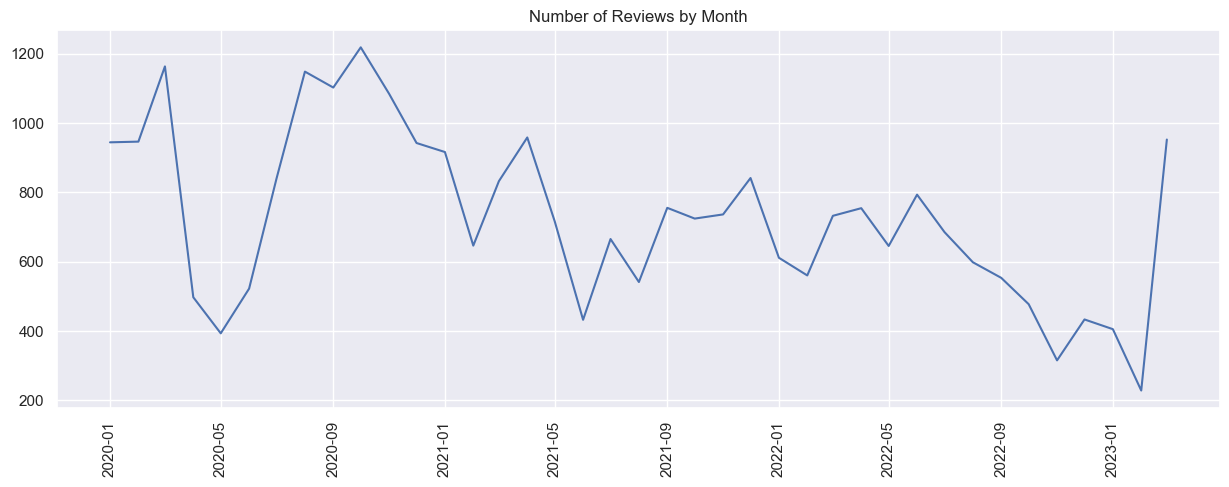

In [82]:
plt.figure(figsize=(15,5))
plt.plot(new_df['mmyyyy'],new_df['url'] )
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Month')
plt.show()


drop march